
## **The Dataset**

This dataset consists of 270k+ records of tortilla prices from Mexico's national System of Information and Market Integration, which surveys 53 cities, 384 mom-and-pop stores, and 120 retail stores that sell "tortillas" throughout Mexico. It contains the following columns:

- `State`: State in Mexico where the city is located, all 32 states en Mexico are included in the dataset.
- `City`: Major cities in Mexico where prices are surveyed.
- `Year`: Year corresponding to observation.
- `Month`: Month corresponding to observation.
- `Day`: Day corresponding to observation.
- `Store type`: Type of store of the surveyed prices (can be Mom and Pop Sotre or Big Retail Store).
- `Price per kilogram`: Estimate of the prices for the type of store, day and city surveyed.


In [14]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import missingno as msno #Missing data visualization module for Python
import datetime as dt

In [15]:
#Reading the data
data = pd.read_csv('tortilla_prices.csv')

In [16]:
data

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
278881,Veracruz,Coatzacoalcos,2024,3,1,Big Retail Store,12.50
278882,Veracruz,Veracruz,2024,3,1,Big Retail Store,13.57
278883,Veracruz,Xalapa,2024,3,1,Big Retail Store,13.97
278884,Yucatán,Mérida,2024,3,1,Big Retail Store,13.20


## Diagnosing data cleaning problems 

In [17]:
data.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [18]:
#Overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  object 
 1   City                278886 non-null  object 
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.9+ MB


In [19]:
#Checking the missing values
data.isnull().sum()

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

## Solving data cleaning problems 

In [20]:
#Drop the missing values
data.dropna(inplace=True)
data.isnull().sum()

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64

In [21]:
#Drop the duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [22]:
#Number of rows per year
data['Year'].value_counts()

Year
2012    17032
2014    16938
2013    16696
2015    16576
2016    16537
2018    16304
2007    16124
2017    16092
2023    15950
2022    15896
2011    15750
2008    15726
2010    15645
2021    15566
2019    15306
2009    15184
2020    12476
2024     2698
Name: count, dtype: int64

In [23]:
#Drop the rows with year 2024 due to the small data volume
data = data[data['Year'] != 2024]
data['Year'].value_counts()

Year
2012    17032
2014    16938
2013    16696
2015    16576
2016    16537
2018    16304
2007    16124
2017    16092
2023    15950
2022    15896
2011    15750
2008    15726
2010    15645
2021    15566
2019    15306
2009    15184
2020    12476
Name: count, dtype: int64

In [24]:
#Fusion of the columns 'Day' and 'Month' and 'Year' to create a new column 'Date'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)
data.head()

C:\Users\yahya\AppData\Local\Temp\ipykernel_13104\203136021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
C:\Users\yahya\AppData\Local\Temp\ipykernel_13104\203136021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)


,State,City,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,Mom and Pop Store,9.9,2007-01-10
2,Baja California,Tijuana,Mom and Pop Store,10.0,2007-01-10
3,Baja California Sur,La Paz,Mom and Pop Store,10.0,2007-01-10
4,Campeche,Campeche,Mom and Pop Store,10.0,2007-01-10
5,Coahuila,Piedras Negras,Mom and Pop Store,10.0,2007-01-10


## Exploratory Data Analysis

In [11]:
data.describe()

,Year,Month,Day,Price per kilogram
count,269798.000000,269798.000000,269798.000000,269798.000000
mean,2014.928376,6.430177,15.947576,11.980866
std,4.859964,3.435612,8.755777,4.256761
min,2007.000000,1.000000,1.000000,0.000000
25%,2011.000000,3.000000,8.000000,9.560000
50%,2015.000000,6.000000,16.000000,11.130000
75%,2019.000000,9.000000,24.000000,14.000000
max,2023.000000,12.000000,31.000000,30.830000


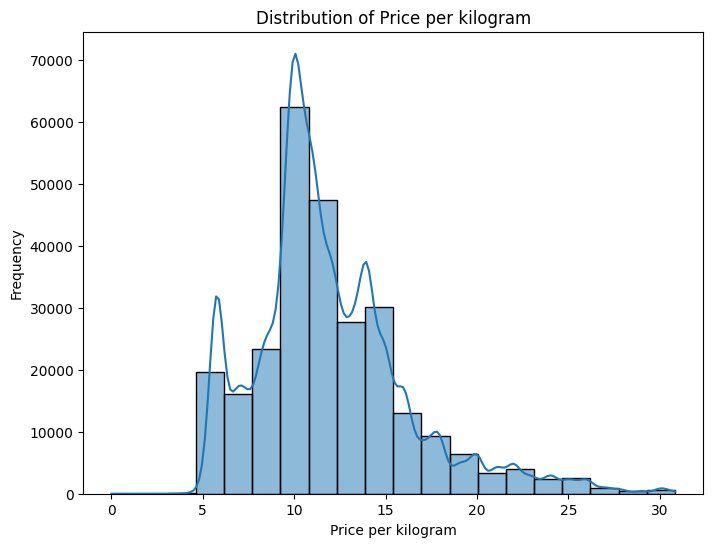

In [12]:
#Plot the distribution of the 'Price per kilogram'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Price per kilogram', bins=20, kde=True)
plt.title('Distribution of Price per kilogram')
plt.xlabel('Price per kilogram')
plt.ylabel('Frequency')
plt.show()

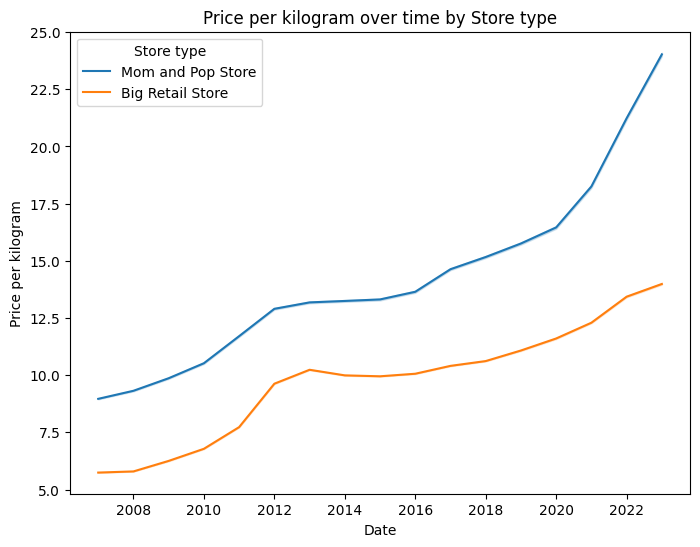

In [13]:
#illustrates the difference in tortilla prices in big retail stores compared to small "mom and pops shops" with a graph
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='Year', y='Price per kilogram', hue='Store type')
plt.title('Price per kilogram over time by Store type')
plt.xlabel('Date')
plt.ylabel('Price per kilogram')
plt.show()


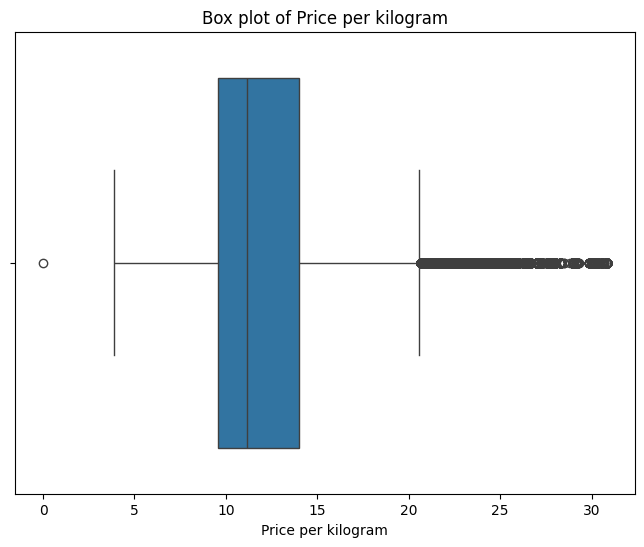

In [14]:
#Plot a box plot of the 'Price per kilogram'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Price per kilogram')
plt.title('Box plot of Price per kilogram')
plt.xlabel('Price per kilogram')
plt.show()

## Model Building

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
# Fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Convert categorical variables to numeric by one-hot encoding
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categorical_cols)

# Define the features (X) and the target variable (y)
X = data.drop('Price per kilogram', axis=1)  # Assuming 'Price per kilogram' is the target
y = data['Price per kilogram']

# Split the data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

#Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=10, random_state=1),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=1)
}

## Evaluating Models

In [18]:
# Dictionary to hold model performance
model_performance = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_validation)
    mse = mean_squared_error(Y_validation, Y_pred)
    model_performance[name] = mse
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 2.973563405153055
Random Forest Regressor Mean Squared Error: 0.015136866549295773
Decision Tree Regressor Mean Squared Error: 0.0194605133432172


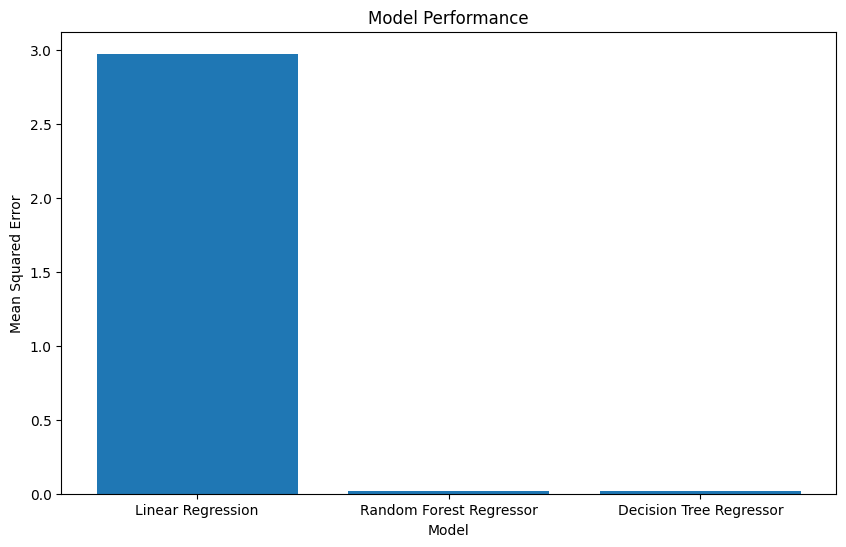

In [20]:
#Comparing Algorithms 
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()
